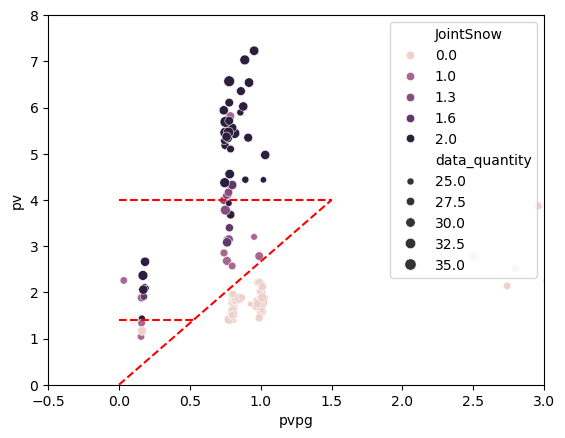

137


camera        date        lat         lon      pvpg        pv  \
1186  sodankyla_full  20/12/2021  67.348319   26.622451  0.766019  4.563280   
1031  sodankyla_full  10/06/2021  67.366338   26.552235  0.926746  1.746953   
220   delta_junction  27/01/2023  63.894614 -145.679776  0.191980  2.091728   
1037  sodankyla_full  10/09/2020  67.339310   26.552235  1.009822  1.607915   
862        oregon_yp  21/07/2021  44.346323 -121.624889  0.804775  1.701962   
...              ...         ...        ...         ...       ...       ...   
120   delta_junction  09/02/2021  63.912632 -145.802560  0.748673  5.457884   
1032  sodankyla_full  10/06/2021  67.375347   26.552235  1.012954  1.775028   
118   delta_junction  09/02/2021  63.894614 -145.802560  0.777384  6.569226   
1180  sodankyla_full  20/12/2021  67.330301   26.552235  0.750965  5.689601   
518       marcell_MN  22/06/2020  47.509405  -93.460768  4.117969  2.200382   

             pg  data_quantity         snr  FSC  TreeSnow  layer_flag  \
1186   5.957139      23.043478  328.230938  1.0       1.0         0.0   
1031   1.885039      23.044444    1.224139  0.0       0.0         0.0   
220   10.895532      23.136364    0.835335  1.0       1.0         0.0   
1037   1.592276      23.200000    9.824427  0.0       0.0         0.0   
862    2.114829      23.205128   72.121567  0.0       0.0         1.0   
...         ...            ...         ...  ...       ...         ...   
120    7.290074      32.507692    0.807835  1.0       1.0         0.0   
1032   1.752328      32.569231    1.154658  0.0       0.0         0.0   
118    8.450422      33.507463    0.821810  1.0       1.0         0.0   
1180   7.576387      33.507463  362.718069  1.0       1.0         0.0   
518    0.534337      36.481481    0.506869  0.0       0.0         0.0   

      file_index  msw_flag  pv_ratio_mean  pv_ratio_max  JointSnow  
1186        22.0  0.000000       2.961596      2.961596        2.0  
1031        16.0  0.000000       1.485386      1.485386        0.0  
220         23.0  1.000000       2.777007      2.777007        2.0  
1037        13.0  0.000000       1.379281      1.379281        0.0  
862         15.0  0.000000       1.673125      1.673125        0.0  
...          ...       ...            ...           ...        ...  
120         15.0  0.000000       2.763907      2.763907        2.0  
1032        16.0  0.000000       1.544796      1.544796        0.0  
118         15.0  0.000000       3.161353      3.161353        2.0  
1180        22.0  0.000000       2.994006      2.994006        2.0  
518          6.0  1.185185       1.407270      1.407270        0.0  

[137 rows x 17 columns]

In [64]:
from scripts.imports import *

df = pd.read_pickle('dataset_landcover_forest_22_th3_1km.pkl')
# print(df.columns)

df_grouped = df.groupby(['camera','date','lat','lon']).agg({
    'pvpg': 'mean',
    'pv': 'max',
    'pg': 'max',
    'data_quantity': 'mean',
    'snr': 'mean',
    'FSC': 'mean',
    'TreeSnow': 'mean',
    'layer_flag': 'mean',
    'file_index': 'mean',
    'msw_flag': 'mean',
    # 'pv_ratio': 'mean',
    'pv_ratio_mean': 'mean',
    'pv_ratio_max': 'mean'
}).reset_index()
df_grouped['JointSnow'] = df_grouped['FSC'] + df_grouped['TreeSnow']
data = df_grouped[((df_grouped['FSC'] <= 0.05)|(df_grouped['FSC'] >= 0.95))
    # &(df_grouped['pvpg']>.5)&(df_grouped['FSC'] > .8)
    # &(df_grouped['pvpg']<2)&(df_grouped['pvpg']>.8)&(df_grouped['FSC'] > .8)
    # &(df_grouped['pvpg']<2)&(df_grouped['pvpg']>.5)&(df_grouped['pv']>2)&(df_grouped['FSC'] > .8)
    # &(df_grouped['pvpg']<.5)&((df_grouped['FSC'] < .5)|(df_grouped['TreeSnow'] > 0))

    &(df_grouped['pv_ratio_mean'] >= 1.1)
    
    &((df_grouped['layer_flag'] <= .7)|(df_grouped['msw_flag'] < 1))&(df_grouped['data_quantity'] > 23)]
    # &(df_grouped['layer_flag'] <= .8)&(df_grouped['data_quantity'] > 10)]

sns.scatterplot(data = data, x='pvpg', y='pv', hue='JointSnow', size='data_quantity')
plt.xlim(-.5,3)
plt.ylim(0,8)
plt.plot([0,1.5],[0,4],'r--')
plt.plot([0,1.5],[4,4],'r--')
plt.plot([0,0.52],[1.41,1.41],'r--')
plt.legend(loc='best')
plt.show()
print(len(data))
data.sort_values('data_quantity')

/tmp/ipykernel_2034649/4104607160.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'classification'] = data.apply(


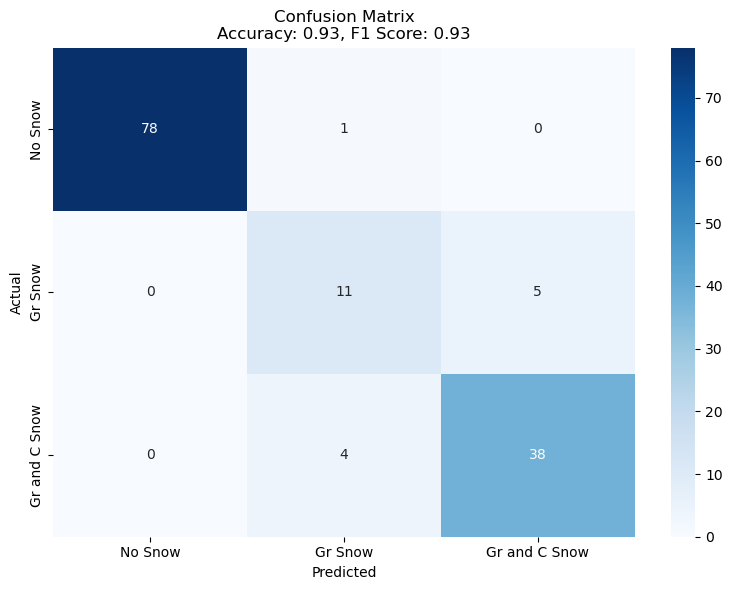

camera        date        lat         lon      pvpg        pv  \
61    delta_junction  05/01/2020  63.912632 -145.802560  0.785258  5.812205   
194   delta_junction  26/01/2024  63.912632 -145.679776  0.787485  3.679825   
314         lacclair  03/04/2024  46.974623  -71.676199  0.159009  1.883117   
342         lacclair  03/12/2019  46.965614  -71.689397  0.757773  4.090497   
346         lacclair  03/12/2019  46.983632  -71.689397  0.772833  4.165920   
407         lacclair  31/01/2021  46.956605  -71.676199  0.779022  3.397622   
412         lacclair  31/01/2021  46.974623  -71.676199  0.762620  3.081925   
591       marcell_MN  26/01/2023  47.527423  -93.460768  0.774842  3.928322   
1066  sodankyla_full  11/06/2020  67.330301   26.552235  0.162171  1.165421   
1248         torgnon  14/02/2023  45.810286    7.541508  0.033637  2.256800   

             pg  data_quantity         snr  FSC  TreeSnow  layer_flag  \
61     7.401653      28.529412  116.616700  1.0       0.0    0.323529   
194    4.672886      27.884615  137.079237  1.0       1.0    0.000000   
314   11.842819      27.581818  181.601900  1.0       0.0    1.000000   
342    5.398051      25.640000  196.189807  1.0       0.3    0.000000   
346    5.390455      27.925926  197.247765  1.0       0.3    0.000000   
407    4.361393      27.156863  173.985116  1.0       0.6    0.000000   
412    4.041234      29.508475  171.513570  1.0       0.6    0.000000   
591    5.069836      24.166667  228.828033  1.0       1.0    0.000000   
1066   7.186365      28.892857    9.363135  0.0       0.0    0.000000   
1248  67.092798      25.761905    0.158256  1.0       0.0    0.000000   

      file_index  msw_flag  pv_ratio_mean  pv_ratio_max  JointSnow  \
61           6.0  0.647059       3.447709      3.447709        1.0   
194         31.0  0.000000       2.359015      2.359015        2.0   
314         22.0  0.000000       1.729781      1.729781        1.0   
342          4.0  0.000000       2.923130      2.923130        1.0   
346          4.0  0.000000       2.654746      2.654746        1.0   
407         10.0  0.000000       2.352892      2.352892        2.0   
412         10.0  0.000000       2.205443      2.205443        2.0   
591         21.0  0.000000       2.644670      2.644670        2.0   
1066        12.0  0.000000       1.386246      1.386246        0.0   
1248        22.0  0.000000       1.339291      1.339291        1.0   

      classification  
61                 2  
194                1  
314                2  
342                2  
346                2  
407                1  
412                1  
591                1  
1066               1  
1248               2

In [65]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# data.loc[:, 'classification'] = data.apply(
#     # lambda row: 1 if row['pvpg'] <= 0.5 else (2 if row['pv'] > 3.8 * row['pvpg'] - 0.3 else 0),
#     lambda row: 1 if row['pvpg'] <= 0.5 else (0 if row['pvpg'] > 1.5 else (2 if row['pv'] > 4 else (1 if row['pv'] > 8/3 * row['pvpg'] else 0))),
#     axis=1
# )
data.loc[:, 'classification'] = data.apply(
    # lambda row: 1 if row['pvpg'] <= 0.5 else (2 if row['pv'] > 3.8 * row['pvpg'] - 0.3 else 0),
    lambda row: 1 if (row['pvpg'] <= 0.5)&(row['pv'] <= 1.41) else (2 if row['pvpg'] <= 0.5 else (0 if row['pvpg'] > 1.5 else (2 if row['pv'] > 4 else (1 if row['pv'] > 8/3 * row['pvpg'] else 0)))),
    axis=1
)

data.loc[:, 'JointSnow'] = round(data['JointSnow'])#.astype(int)

# Compute confusion matrix
labels = ['No Snow', 'Gr Snow', 'Gr and C Snow']
cm = confusion_matrix(data['JointSnow'], data['classification'])

# Calculate accuracy and F1 score
accuracy = accuracy_score(data['JointSnow'], data['classification'])
f1 = f1_score(data['JointSnow'], data['classification'], average='weighted')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, F1 Score: {f1:.2f}')
plt.tight_layout()
plt.show()
data[((data['classification']==0)&(data['FSC']>.95))|
    ((data['classification']==1)&((data['FSC']<.05)|(data['TreeSnow']>=0.5)))|
    ((data['classification']==2)&(data['TreeSnow']<.5))]

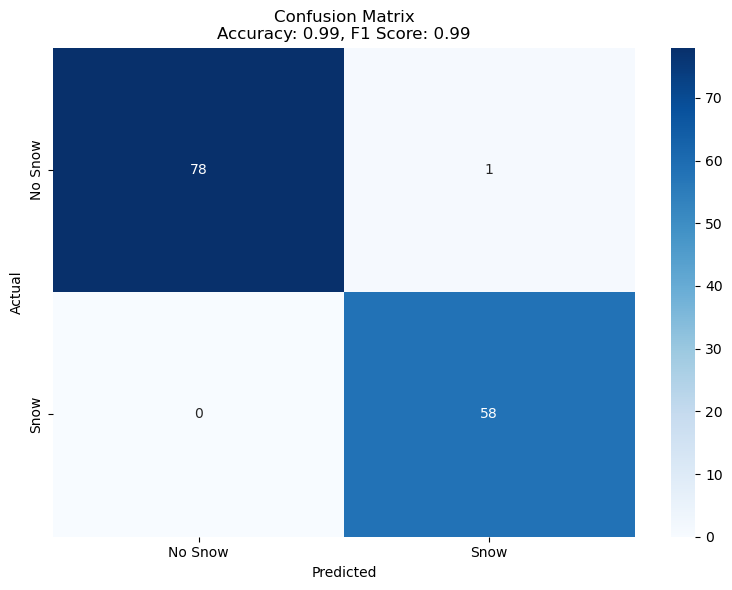

camera        date        lat        lon      pvpg        pv  \
1066  sodankyla_full  11/06/2020  67.330301  26.552235  0.162171  1.165421   

            pg  data_quantity       snr  FSC  TreeSnow  layer_flag  \
1066  7.186365      28.892857  9.363135  0.0       0.0         0.0   

      file_index  msw_flag  pv_ratio_mean  pv_ratio_max  JointSnow  \
1066        12.0       0.0       1.386246      1.386246        0.0   

      classification  
1066               1

In [66]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

data.loc[:, 'classification'] = data.apply(
    # lambda row: 1 if row['pvpg'] <= 0.5 else (1 if row['pv'] > 3.8 * row['pvpg'] - 0.3 else 0),
    lambda row: 1 if row['pvpg'] <= 0.5 else (0 if row['pvpg'] > 1.5 else (1 if row['pv'] > 4 else (1 if row['pv'] > 8/3 * row['pvpg'] else 0))),
    axis=1
)

data.loc[:, 'FSC'] = round(data['FSC'])#.astype(int)

# Compute confusion matrix
labels = ['No Snow', 'Snow']
cm = confusion_matrix(data['FSC'], data['classification'])

# Calculate accuracy and F1 score
accuracy = accuracy_score(data['FSC'], data['classification'])
f1 = f1_score(data['FSC'], data['classification'], average='weighted')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}, F1 Score: {f1:.2f}')
plt.tight_layout()
plt.show()
data[((data['classification']==0)&(data['FSC']>.95))|((data['classification']==1)&(data['FSC']<.05))].sort_values('data_quantity')

# Five Sites

In [7]:
from scripts.FSC_dataframe_phoreal import *

df=pd.read_pickle('five_sites_data.pkl')
loc_df = df[df['Confidence'] == 1].reset_index(drop=True)

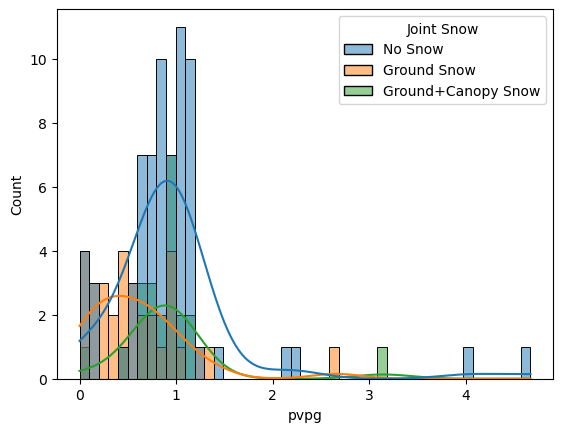

In [17]:
plt.figure()
plot = sns.histplot(loc_df[(loc_df['pvpg']<5)], x='pvpg', hue='Joint Snow', kde=True, palette='tab10', binwidth=.1)

hue_labels = {'0.0': 'No Snow', '1.0': 'Ground Snow', '2.0': 'Ground+Canopy Snow'}
legend = plot.legend_
# Set the new labels
new_labels = ['No Snow', 'Ground Snow', 'Ground+Canopy Snow']
for text, new_label in zip(legend.get_texts(), new_labels):
    text.set_text(new_label)

# plt.savefig('./images/five_sites/pvpg_10km.png')
plt.show()

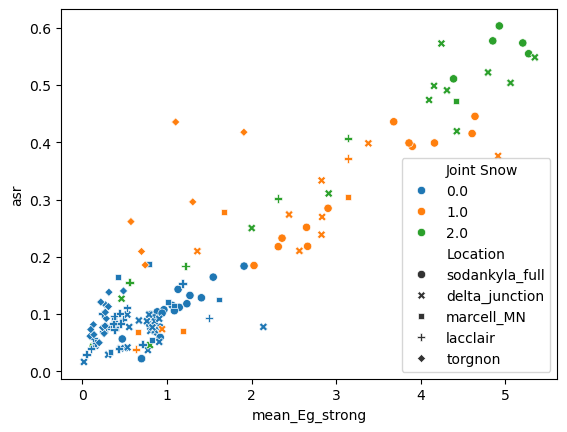

In [17]:
sns.scatterplot(loc_df, x='mean_Eg_strong', y = 'asr' ,hue='Joint Snow', palette='tab10', style='Location')
plt.legend(loc='lower right')
# plt.savefig('./images/five_sites/10km_asr_Eg.png')
plt.show()

# New scripts and functions

array(['15/11/2018'], dtype=object)

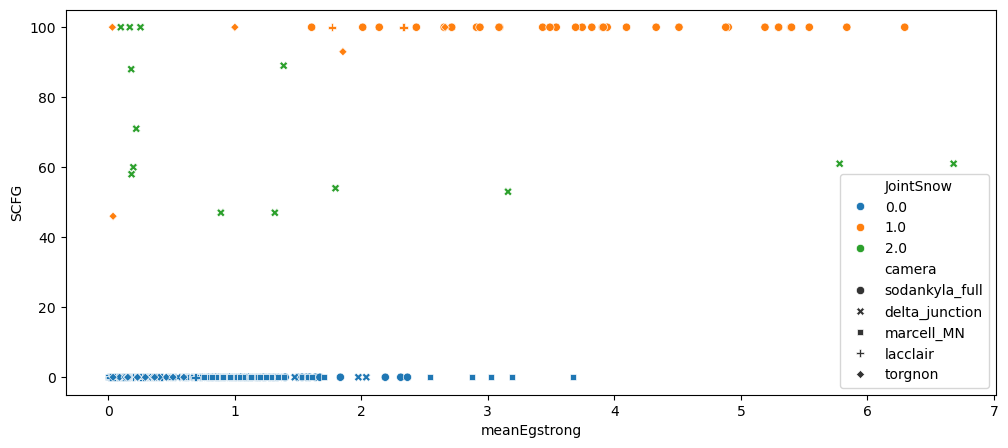

In [17]:
from scripts.hist_plot import *

# Load the dataframe
df = pd.read_pickle('five_sites_data_snow_cc.pkl')
loc_df = df[(df['Confidence'] == 1)&(df['msw']<5.1)&(df['date']!='26/03/2019')]

plt.figure(figsize=(12,5))
sns.scatterplot(loc_df, x='meanEgstrong', y = 'SCFG' ,hue='JointSnow', palette='tab10', style='camera')

loc_df[(loc_df['camera']=='delta_junction')&(loc_df['SCFG'] <= 95)&(loc_df['SCFG'] >= 20)]['date'].unique()

camera        date          pvpg  y_strong    y_weak  \
702  delta_junction  15/11/2018 -5.768161e-01  0.418348       NaN   
703  delta_junction  15/11/2018 -1.457407e+00  1.043939       NaN   
704  delta_junction  15/11/2018 -1.856489e+00  1.036329       NaN   
705  delta_junction  15/11/2018 -1.419103e+00       NaN  0.577842   
706  delta_junction  15/11/2018 -8.407083e-02  0.610896       NaN   
707  delta_junction  15/11/2018 -2.502399e-17  0.671274       NaN   
708  delta_junction  15/11/2018 -2.280704e+00  1.153381       NaN   
709  delta_junction  15/11/2018 -8.493039e-02  0.397648       NaN   
710  delta_junction  15/11/2018 -9.254150e-01  2.340943       NaN   
711  delta_junction  15/11/2018 -3.913045e-01  1.388838       NaN   
712  delta_junction  15/11/2018 -5.483871e-01  1.122103       NaN   
713  delta_junction  15/11/2018 -2.303710e-01  0.507334       NaN   
714  delta_junction  15/11/2018 -1.727019e-01  0.329387       NaN   
715  delta_junction  15/11/2018 -1.747049e-25  0.554422  0.150231   
716  delta_junction  15/11/2018 -1.644980e-01  1.326560  0.460108   

         x_strong        x_weak   longitude  latitude  meanEgstrong  ...  \
702  7.252717e-01           NaN -145.847939   63.8386      0.221779  ...   
703  7.162991e-01           NaN -145.847939   63.8436      0.198897  ...   
704  5.582201e-01           NaN -145.779794   63.8636      0.255298  ...   
705           NaN  4.071882e-01 -145.768436   63.8636           NaN  ...   
706  7.266445e+00           NaN -145.779794   63.8686      0.170759  ...   
707  2.682524e+16           NaN -145.768436   63.8686      0.099733  ...   
708  5.057129e-01           NaN -145.711649   63.8686      0.184580  ...   
709  4.682047e+00           NaN -145.768436   63.8736      0.182006  ...   
710  2.529614e+00           NaN -145.711649   63.8736      1.386643  ...   
711  3.549251e+00           NaN -145.700291   63.8836      3.159575  ...   
712  2.046187e+00           NaN -145.700291   63.8986      1.796296  ...   
713  2.202247e+00           NaN -145.700291   63.9036      1.316906  ...   
714  1.907258e+00           NaN -145.700291   63.9086      0.890597  ...   
715  3.173476e+24  8.599140e+23 -145.688933   63.9236      5.780334  ...   
716  8.064292e+00  2.797043e+00 -145.688933   63.9286      6.680948  ...   

     data_quantity  FSC  TreeSnow  JointSnow  Confidence  MxD10A1F         cc  \
702            4.0  1.0       1.0        2.0         1.0      77.0        NaN   
703            3.0  1.0       1.0        2.0         1.0      75.5        NaN   
704            5.0  1.0       1.0        2.0         1.0      82.0  39.251999   
705            3.0  1.0       1.0        2.0         1.0      80.0    41.5854   
706            2.0  1.0       1.0        2.0         1.0      76.0  36.949902   
707            2.0  1.0       1.0        2.0         1.0      81.0    41.4743   
708            3.0  1.0       1.0        2.0         1.0      73.5  37.466301   
709            2.0  1.0       1.0        2.0         1.0      77.5  34.439999   
710            4.0  1.0       1.0        2.0         1.0      75.0     24.656   
711            2.0  1.0       1.0        2.0         1.0      79.0  31.012203   
712            2.0  1.0       1.0        2.0         1.0      77.5    24.7721   
713            2.0  1.0       1.0        2.0         1.0      79.5    15.0802   
714            2.0  1.0       1.0        2.0         1.0      78.0    15.7097   
715            5.0  1.0       1.0        2.0         1.0      72.5  47.877399   
716            6.0  1.0       1.0        2.0         1.0      73.0  33.081902   

     MxD10A1   SCFG  SCFV  
702     77.0   71.0  43.0  
703     75.5   60.0  40.0  
704     82.0  100.0  24.0  
705     80.0  100.0  23.0  
706     76.0  100.0  24.0  
707     81.0  100.0  23.0  
708     73.5   58.0  48.0  
709     77.5   88.0  24.0  
710     75.0   89.0  41.0  
711     79.0   53.0  34.0  
712     77.5   54.0  35.0  
713     79.5   47.0  37.0  
714     78.0   47.0  37.0  
71

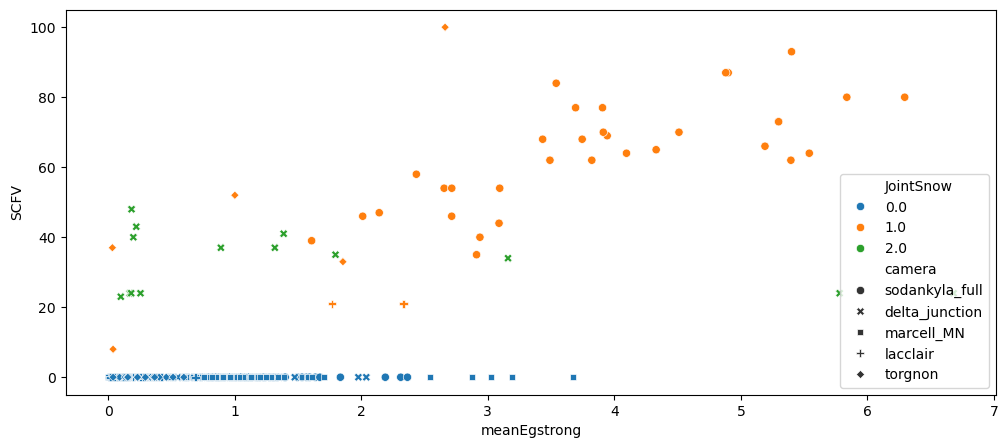

In [5]:
from scripts.hist_plot import *

# Load the dataframe
df = pd.read_pickle('five_sites_data_snow_cc.pkl')
loc_df = df[(df['Confidence'] == 1)&(df['msw']<5.1)&(df['date']!='26/03/2019')]

plt.figure(figsize=(12,5))
sns.scatterplot(loc_df, x='meanEgstrong', y = 'SCFV' ,hue='JointSnow', palette='tab10', style='camera')

# loc_df[(loc_df['camera']=='marcell_MN')&(loc_df['SCFV'] <= 100)]['date'].unique()
loc_df[(loc_df['JointSnow']==2)&(loc_df['SCFV']<=100)]

No 26/3/2019


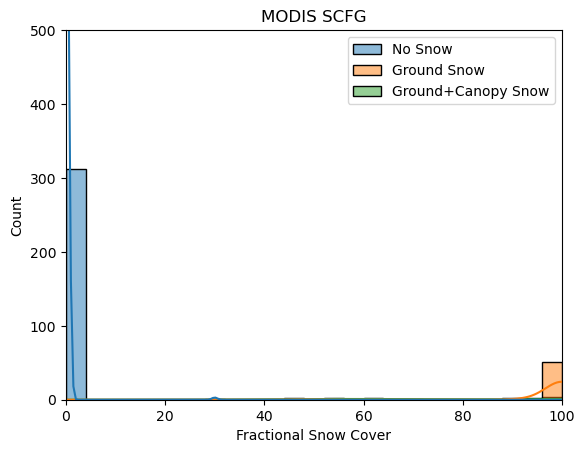

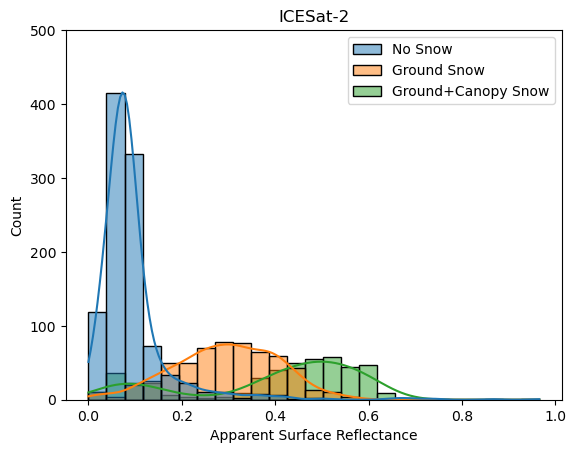

In [3]:
from scripts.hist_plot import *

# Load the dataframe
df = pd.read_pickle('five_sites_data_snow_cc.pkl')

for P in range(1,2):

    if P == 0:
        print('All')
        loc_df = df[(df['msw'] < 5.1) & (df['Confidence'] == 1)].reset_index(drop=True)
    # Filter the dataframe
    
    if P == 1:
        print('No 26/3/2019')
        loc_df = df[(df['msw'] < 5.1) & (df['Confidence'] == 1)&(df['date'] != '26/03/2019')&(df['date'] != '24/12/2019')].reset_index(drop=True)

    # elif P == 2:
    #     print('No Marcell msw < 2.1')
    #     loc_df = df[(df['msw'] < 2.1) & (df['Confidence'] == 1)&(df['camera'] != 'marcell_MN')].reset_index(drop=True)
        
    
    hue_labels = {'0.0': 'No Snow', '1.0': 'Ground Snow', '2.0': 'Ground+Canopy Snow'}
    
    titles = ['MODIS SCFG', 'ICESat-2']
    x_axis = ['Fractional Snow Cover', 'Apparent Surface Reflectance']
    for i, ABC in enumerate(['SCFG', 'asr']):

        # if ABC == 'MxD10A1F':
        
        Plot = sns.histplot(loc_df[loc_df[ABC] <= 100], x=ABC ,hue='JointSnow', palette='tab10', legend='brief', kde=True, bins=25)

        # else:
        #     Plot = sns.histplot(loc_df[loc_df[ABC] <= 100], x=ABC ,hue='JointSnow', palette='tab10', legend='brief', kde=True, bins=25)
        
        # Get the current legend and its handles
        legend = Plot.get_legend()
        handles = legend.legend_handles
        
        # print(labels)
        new_labels = [hue_labels[label] if label in hue_labels else label for label in hue_labels.keys()]
        
        Plot.legend(handles=handles, labels=new_labels, loc='upper right')
        plt.ylim(0,500)
        if ABC == 'SCFG':
            plt.xlim(0,100)
        
        # Extracting the KDE lines from the seaborn plot
        lines = Plot.get_lines()
        
        # Getting the x and y data for each KDE line
        kde_data = {}
        for line in lines:
            label = line.get_label()
            x_data = line.get_xdata()
            y_data = line.get_ydata()
            kde_data[label] = (x_data, y_data)
    
        plt.title(titles[i])
        plt.xlabel(x_axis[i])
        # plt.savefig(f'./images/hist_vector_{ABC}.svg')
        plt.show()
    
    # FI = hist_plot(loc_df, hue_labels, X='MxD10A1F', Hue='JointSnow', save=None, plot=True, xlim=(0,100), ylim=None, preset=False)#, save='/500mres/meanEvstrong_hist_msw2')
    # FI = hist_plot(loc_df, hue_labels, X='asr', Hue='JointSnow', save=None, plot=True, ylim=None, preset=False)
    # print(FI)

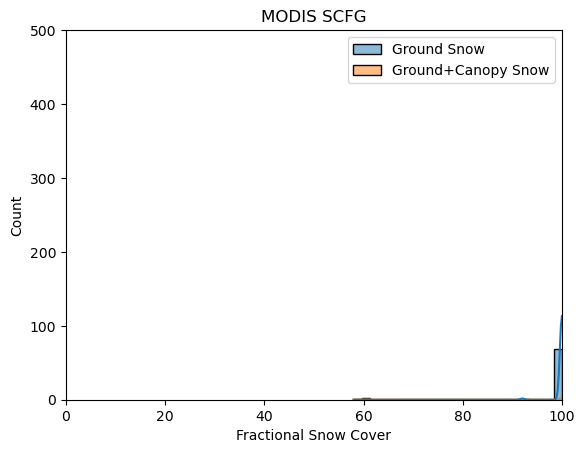

KS test for MODIS SCFG (JointSnow 1 vs 2):
Statistic: 0.7500, P-value: 1.0495e-02
The distributions are significantly different (p < 0.05).




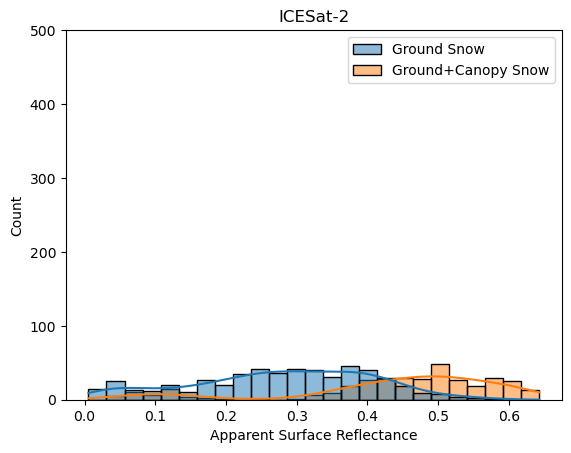

KS test for ICESat-2 (JointSnow 1 vs 2):
Statistic: 0.5658, P-value: 4.5028e-63
The distributions are significantly different (p < 0.05).




In [2]:
from scipy.stats import ks_2samp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataframe
df = pd.read_pickle('five_sites_data_snow_cc.pkl')

for P in range(1, 2):

    if P == 0:
        print('All')
        loc_df = df[(df['msw'] < 5.1) & (df['Confidence'] == 1)].reset_index(drop=True)
    
    if P == 1:
        # print('No 26/3/2019')
        loc_df = df[(df['msw'] < 2.1) & (df['Confidence'] == 1) &(df['JointSnow']!=0)].reset_index(drop=True)
    
    hue_labels = {'1.0': 'Ground Snow', '2.0': 'Ground+Canopy Snow'}
    titles = ['MODIS SCFG', 'ICESat-2']
    x_axis = ['Fractional Snow Cover', 'Apparent Surface Reflectance']
    
    for i, ABC in enumerate(['SCFG', 'asr']):
        # Plotting
        Plot = sns.histplot(loc_df[loc_df[ABC] <= 100], x=ABC, hue='JointSnow', palette='tab10', legend='brief', kde=True, bins=25)

        # Update legend labels
        legend = Plot.get_legend()
        handles = legend.legend_handles
        new_labels = [hue_labels[label] if label in hue_labels else label for label in hue_labels.keys()]
        Plot.legend(handles=handles, labels=new_labels, loc='upper right')
        
        plt.ylim(0, 500)
        if ABC == 'SCFG':
            plt.xlim(0, 100)

        plt.title(titles[i])
        plt.xlabel(x_axis[i])
        plt.show()

        # Statistical comparison between JointSnow = 1 and JointSnow = 2
        data_js1 = loc_df[(loc_df['JointSnow'] == 1) & (loc_df[ABC] <= 100)][ABC].values
        data_js2 = loc_df[(loc_df['JointSnow'] == 2) & (loc_df[ABC] <= 100)][ABC].values
        
        # Perform the Kolmogorov-Smirnov test
        ks_stat, p_value = ks_2samp(data_js1, data_js2)
        print(f"KS test for {titles[i]} (JointSnow 1 vs 2):")
        print(f"Statistic: {ks_stat:.4f}, P-value: {p_value:.4e}")
        
        # Interpret the p-value
        if p_value < 0.05:
            print("The distributions are significantly different (p < 0.05).")
        else:
            print("No significant difference between the distributions (p ≥ 0.05).")
        print("\n")
